# Data Analysis Amazon Data

In [1]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Read in data
Here, I read in one file:
* all the amazon alexa logs provided to me by a family member

There are a total of 377 inputs, 157 unique inputs and 7 private inputs

In [3]:
voice_inputs = dict()
all_voice_inputs = list()
with open("alexa_convos.txt", encoding="utf-8") as f:
    for line in f:
        lline = line.strip().split("\t")
        voice_inputs[lline[0].lower()] = lline[1]
        all_voice_inputs.append(lline[0].lower())
print(len(voice_inputs), len(all_voice_inputs))

157 377


## Create embeddings
Embeddings are created with the SentenceTransformer (Reimers and
Gurevych, 2019)

In [4]:
model = SentenceTransformer("all-MiniLM-L6-v2")
# model = SentenceTransformer("distiluse-base-multilingual-cased-v1")
embeddings = model.encode(list(voice_inputs.keys()))

## Create dataframe
The dataframe includes all unique input sentences (157) as well as their embeddings (vectors of length 384).

In [5]:
data = dict()
for sentence, embedding in zip(voice_inputs, embeddings):
    data[sentence] = embedding

sentences = list(data.keys())
df = pd.DataFrame(data)
df = df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
stopp,-0.043672,0.039983,0.032883,-0.043651,-0.012084,-0.057227,0.073072,0.031947,-0.069549,0.028728,...,0.123228,-0.009964,-0.000738,-0.002821,-0.147191,0.087583,0.092841,0.020351,-0.008296,0.030227
spiel baseball furies von buckethead,0.013895,0.135451,-0.013464,-0.072781,-0.050665,0.110442,0.043030,0.106904,0.030463,0.054039,...,0.002507,0.068232,-0.041778,-0.083577,-0.042367,-0.011146,0.024942,-0.025897,0.011713,0.108263
spiel droid assembly von buckethead,-0.070793,0.047295,0.039729,-0.128894,-0.082859,-0.014693,-0.001912,0.092181,-0.009947,0.023521,...,-0.001889,0.068176,-0.013217,-0.135418,-0.029111,0.039383,-0.021694,0.018832,0.039542,0.001352
wie spät ist es,-0.018984,0.003637,0.094989,0.031015,-0.027345,0.074912,0.165184,0.092420,0.101756,0.020274,...,0.013723,0.026758,0.057200,-0.032270,-0.037954,-0.006416,0.021040,0.014771,-0.028571,0.023135
spiel schicker schlitten auf spotify,0.001136,0.022403,-0.033330,-0.039073,-0.010890,0.096977,0.108381,0.072951,-0.006894,-0.070957,...,0.070296,0.031063,-0.007029,0.015127,-0.029750,-0.022040,0.004736,0.058060,0.022632,0.114868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spiel trikot von turin,-0.086418,0.124816,0.007174,-0.018914,-0.117026,0.009004,0.132764,0.063798,-0.009158,0.012895,...,0.059624,-0.014154,0.048831,-0.060412,-0.056748,0.020769,0.002831,-0.022973,-0.073613,0.043041
spiel paranoid von black sabbath,-0.046809,0.076248,-0.060928,-0.013546,-0.033267,0.104863,0.051437,-0.057151,0.052279,-0.036403,...,0.036745,0.032214,0.001625,0.003079,-0.086877,-0.004031,0.066191,-0.056525,-0.067722,-0.066838
spiel high voltage von linkin park,-0.058577,0.068767,0.019051,-0.041889,-0.066541,0.017092,-0.004601,0.096505,-0.031256,-0.020408,...,0.003854,-0.005022,-0.031882,-0.021958,-0.091787,-0.057062,0.057523,-0.041936,-0.092731,0.002604
spiel never before von deep purple,-0.059571,-0.074876,-0.008708,-0.078539,-0.084701,0.115526,0.002738,-0.012859,0.022021,-0.083453,...,0.091329,0.016763,-0.009005,-0.025577,-0.069826,-0.023245,-0.006357,-0.064428,-0.037558,0.013225


## Calculate sensitive data proportion
See how many of the recorded utterances where recorded accidentally

100
[7, 220, 150]


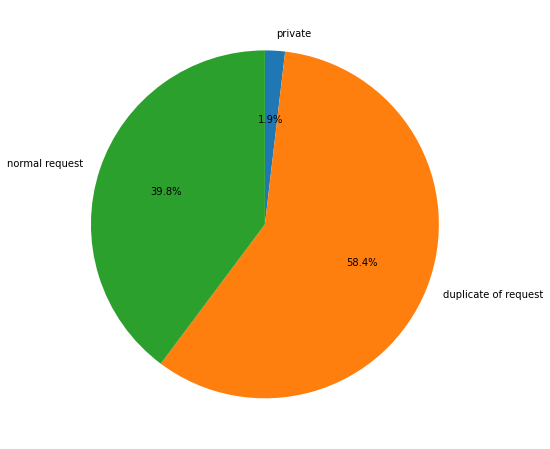

In [6]:
sentype = list()
words = list()
for sen in all_voice_inputs:
    if voice_inputs[sen] == "True":
        sentype.append("private")
    else:
        if sen in words:
            sentype.append("duplicate of request")
        else:
            sentype.append("normal request")
            words.append(sen)

print(all_voice_inputs.count("wie spät ist es"))
prop = [sentype.count("private"), sentype.count("duplicate of request"), sentype.count("normal request")]
print(prop)
labels = ["private", "duplicate of request", "normal request"]
fig = plt.figure(figsize=(8,8))
plot = plt.pie(prop, labels = labels, startangle=90, counterclock=False, textprops={"fontsize":10}, autopct = '%.1f%%')
fig.savefig('proportions_amazon.jpg', bbox_inches='tight', dpi=150)

## Standardize Data
Standardizing the Data for the PCA

In [7]:
x = StandardScaler().fit_transform(df)
embeddingsdataframe = pd.DataFrame(x)
embeddingsdataframe.index = sentences
embeddingsdataframe

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
stopp,-0.511935,0.185780,0.628800,-0.452161,0.652826,-2.308059,0.186807,0.513488,-2.448235,1.219785,...,2.087216,-0.582573,-0.188828,0.141006,-3.042981,2.527905,1.246842,0.447188,-0.244577,0.623410
spiel baseball furies von buckethead,0.707673,2.270305,-0.487334,-1.156472,-0.236466,0.966371,-0.406901,2.040499,0.144173,1.821290,...,-0.890083,1.180695,-1.273825,-1.563826,-0.184726,-0.363841,-0.402376,-0.536066,0.158022,2.440706
spiel droid assembly von buckethead,-1.086511,0.345428,0.793668,-2.513185,-0.978539,-1.477404,-1.295080,1.740562,-0.903285,1.096056,...,-0.998488,1.179442,-0.518742,-2.658218,0.176721,1.116131,-1.535129,0.414913,0.717960,-0.049019
wie spät ist es,0.011109,-0.607822,2.124452,1.353137,0.301051,0.272504,2.007190,1.745432,1.992159,1.018895,...,-0.613459,0.245490,1.342938,-0.480689,-0.064381,-0.225296,-0.497153,0.328556,-0.652524,0.458249
spiel schicker schlitten auf spotify,0.437368,-0.198069,-0.965760,-0.341459,0.680348,0.703415,0.884607,1.348808,-0.824151,-1.149150,...,0.781782,0.342563,-0.355156,0.519902,0.159319,-0.682930,-0.893157,1.248927,0.377719,2.594518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spiel trikot von turin,-1.417538,2.038074,0.009668,0.145943,-1.766101,-1.014619,1.366477,1.162358,-0.882834,0.843536,...,0.518588,-0.677068,1.121687,-1.074788,-0.576864,0.570933,-0.939440,-0.473910,-1.558790,0.921834
spiel paranoid von black sabbath,-0.578397,0.977614,-1.630382,0.275726,0.164569,0.857407,-0.240759,-1.301598,0.709683,-0.327989,...,-0.045691,0.368518,-0.126347,0.265542,-1.398376,-0.155434,0.599522,-1.187229,-1.440264,-1.637013
spiel high voltage von linkin park,-0.827696,0.814270,0.295690,-0.409549,-0.602413,-0.856669,-1.348219,1.828661,-1.455644,0.052114,...,-0.856873,-0.471136,-1.012198,-0.263005,-1.532259,-1.708725,0.388990,-0.877065,-1.943454,-0.019866
spiel never before von deep purple,-0.848764,-2.322119,-0.372811,-1.295687,-1.020999,1.065656,-1.203197,-0.399289,-0.074655,-1.446090,...,1.300513,0.020110,-0.407388,-0.339388,-0.933456,-0.718228,-1.162596,-1.355258,-0.833338,0.227465


## Dimensionality Reduction
Performing the PCA-Algorithm, reducing the embeddings dimensions from 384 to 2 in order to gain a nice visual representation of the inputs.

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.index = sentences
principalDf

,principal component 1,principal component 2
stopp,2.885360,7.960933
spiel baseball furies von buckethead,-3.986934,8.237841
spiel droid assembly von buckethead,-4.490701,8.041739
wie spät ist es,11.361470,0.184178
spiel schicker schlitten auf spotify,5.312055,-4.291915
...,...,...
spiel trikot von turin,1.786918,-3.402971
spiel paranoid von black sabbath,-6.062411,-3.663653
spiel high voltage von linkin park,-3.328500,2.121418
spiel never before von deep purple,-9.755202,-1.304376


## Adding manual annotation
Adding the manual annotations to the dataframe

In [9]:
private = list()
for sen in sentences:
    if voice_inputs[sen] == "True":
        private.append(True)
    else:
        private.append(False)
finalDf = principalDf
finalDf['private'] = private
finalDf

,principal component 1,principal component 2,private
stopp,2.885360,7.960933,False
spiel baseball furies von buckethead,-3.986934,8.237841,False
spiel droid assembly von buckethead,-4.490701,8.041739,False
wie spät ist es,11.361470,0.184178,False
spiel schicker schlitten auf spotify,5.312055,-4.291915,False
...,...,...,...
spiel trikot von turin,1.786918,-3.402971,False
spiel paranoid von black sabbath,-6.062411,-3.663653,False
spiel high voltage von linkin park,-3.328500,2.121418,False
spiel never before von deep purple,-9.755202,-1.304376,False


## Plot PCA

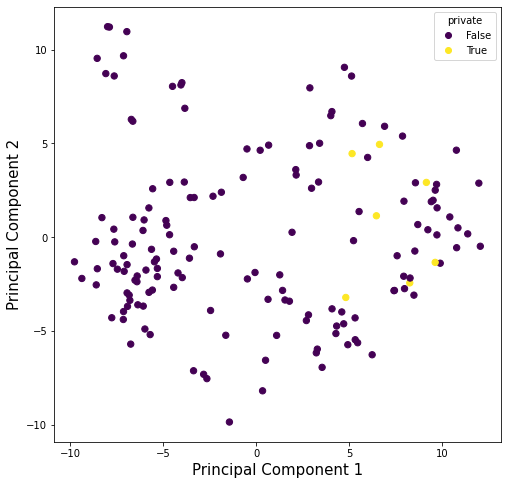

In [10]:
#fig = plt.figure(figsize = (25,30))
fig = plt.figure(figsize=(8,8))
scatter = plt.scatter(finalDf["principal component 1"], finalDf["principal component 2"], c = finalDf["private"], s = 40)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=[False, True],
           title="private")
# annotations = sentences
# for i, label in enumerate(annotations):
#     plt.annotate(label, (finalDf["principal component 1"][i], finalDf["principal component 2"][i]))
fig.savefig('PCAplot_amazon.jpg', bbox_inches='tight', dpi=150)

## K-Means Clustering
Clustering the reduced dimensions with k-means

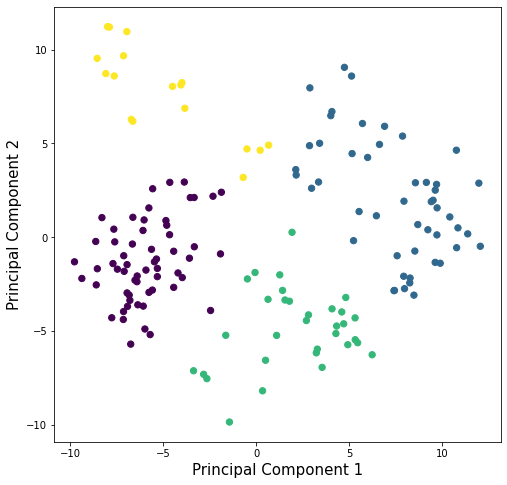

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

# fig = plt.figure(figsize = (25,30))
fig = plt.figure(figsize = (8,8))
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
scatter2 = plt.scatter(finalDf["principal component 1"], finalDf["principal component 2"], c=y_kmeans, s=40, cmap='viridis')
annotations = sentences
# for i, label in enumerate(annotations):
    # plt.annotate(label, (finalDf["principal component 1"][i], finalDf["principal component 2"][i]))
fig.savefig('PCAplot2_amazon.jpg', bbox_inches='tight', dpi=150)

## Cluster
* top -> music requests, buckethead
* left -> music requests, english music
* bottom -> music requests, german music
* right -> leiser, lauter, wie spät, stopp, weather, shorter random requests

## Evaluation

In [20]:
eval = list()
for i in zip(finalDf.index, y_kmeans, finalDf["private"]):
    eval.append((i[1], i[2]))

In [21]:
tp = sum([1 for i,j in eval if j and i == 1])
fn = sum([1 for i,j in eval if j and i != 1])
fp = sum([1 for i,j in eval if j == False and i == 1])
precision = tp / (tp + fp)
recall = tp / (tp + fn)
fscore = (2 * precision * recall) / (precision + recall)
print(tp, fn, fp, precision, recall, fscore)

6 1 43 0.12244897959183673 0.8571428571428571 0.21428571428571427
